<a href="https://colab.research.google.com/github/Cs-Student/Deep_Learning_Pytorch/blob/main/Pytorch%20Workflow%20Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.2.1+cu121'

In [4]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step)
y = weight * X + bias

In [5]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
def plot_predictions(train_data = X_train, train_label = y_train, test_data = X_test, test_labels = y_test, predictions = None):
  plt.figure(figsize = (7,4))
  plt.scatter(train_data, train_label, c='b', s=4, label= "training data" )
  plt.scatter(test_data, test_labels, c='g', s=4, label= "test data" )
  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")
  plt.legend(prop={"size":5})

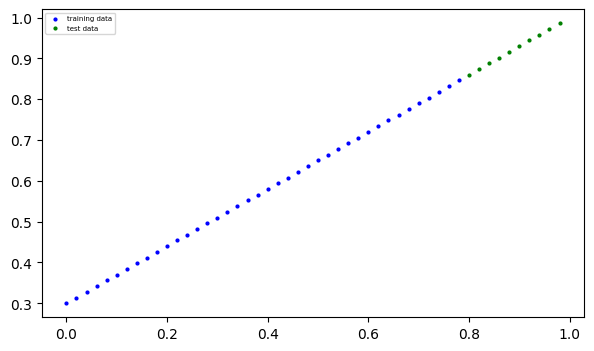

In [7]:
plot_predictions()

In [8]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad = True)
    self.bias = nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad= True))
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [9]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
model_0.state_dict()['weights'].shape

torch.Size([1])

In [11]:
with torch.inference_mode():
  y_preds = model_0(X_test)
print(y_preds)

tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])


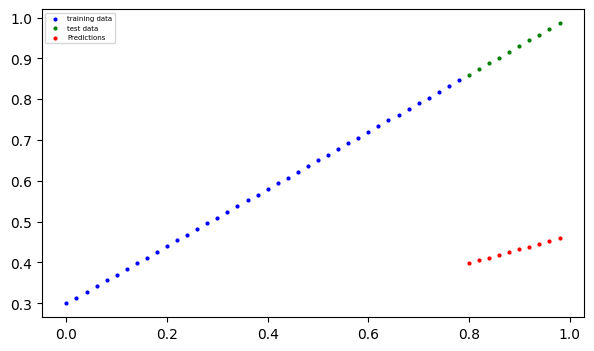

In [12]:
plot_predictions(predictions=y_preds)

In [36]:
import torch.nn.init as init

def reset_model_weights(model):
    for name, param in model.named_parameters():
        if 'weight' in name:
            # Reinitialize weights with random values
            init.normal_(param.data, 0)
        elif 'bias' in name:
            # Reinitialize biases with zeros
            init.constant_(param.data, 0)


In [40]:
reset_model_weights(model_0)
torch.manual_seed(42)
epochs = 200
train_loss_values = []
test_loss_values = []
epoch_count = []
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)

for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred, y_train)
  # reset previous grad to 0
  optimizer.zero_grad()
  # calculate grad
  loss.backward()
  # update param using calculate grad
  optimizer.step()
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test.type(torch.float))
    if epoch % 10 ==  0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      # print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss : | {test_loss}")

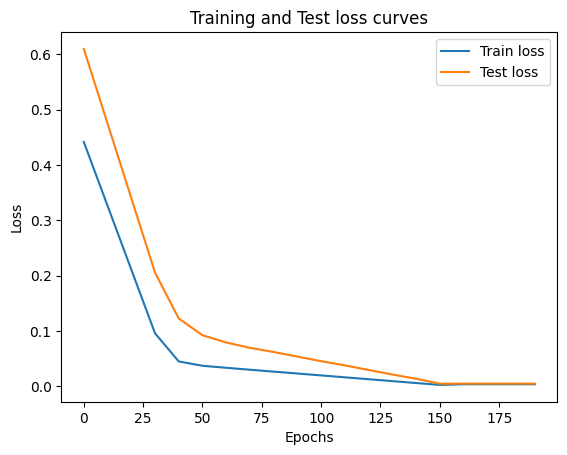

In [41]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and Test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [42]:
print(model_0.state_dict())

OrderedDict([('weights', tensor([0.6911])), ('bias', tensor([0.2995]))])


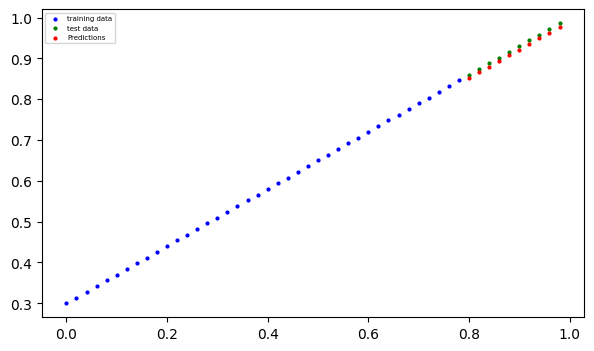

In [44]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
plot_predictions(predictions=y_preds)